# Raw data study and visualisation

In [1]:
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
%matplotlib inline

### Import data from the database

We gather the data in a csv file named Global DataBase and open it

In [2]:
from google.colab import files
import io
uploaded = files.upload()

Saving Global DataBase3.csv to Global DataBase3.csv


In [30]:
df=pd.read_csv(io.BytesIO(uploaded['Global DataBase.csv']), index_col='datetime', parse_dates=True, dayfirst=True)
df = df.sort_index()
df.head()

,Price - PT [€/MWh],Price - ES [€/MWh],Actual Consumption (MWh),Biomass AA,Fossil Gas AA,Fossil Hard Coal AC,Hydro Pumped Storage AA,Hydro Pumped Storage AC,Hydro Run-of-river and poundage AA,Hydro Water Reservoir AA,Other AA,Solar AA,Wind Onshore AA,Electricity Consumption (MWh),Season
datetime,,,,,,,,,,,,,,,
2017-01-01 01:00:00,58.82,58.82,5302,355.00,1654,0,168,5,335,0,41,0,325,5302,1
2017-01-01 02:00:00,58.23,58.23,5077,358.00,999,0,157,6,218,0,41,0,374,5077,1
2017-01-01 03:00:00,51.95,51.95,4875,358.00,805,0,101,60,248,0,40,0,420,4875,1
2017-01-01 04:00:00,47.27,47.27,4561,352.00,668,0,100,33,184,0,40,0,433,4561,1
2017-01-01 05:00:00,46.90,45.49,4271,357.00,357,0,0,663,190,3,41,0,450,4271,1


### Adding the year, quarter, month and day features

In [5]:
df = df.reset_index(drop=False)

df['Time']=pd.to_datetime(df['datetime']) 
#DatetimeIndex, which is a pandas index that is optimized to index data with dates and times.
df['year'] = df['Time'].apply(lambda x: x.year)
df['quarter'] = df['Time'].apply(lambda x: x.quarter)
df['month'] = df['Time'].apply(lambda x: x.month)
df['day'] = df['Time'].apply(lambda x: x.day)


df=df.loc[:,['Time','Price - PT [€/MWh]','Price - ES [€/MWh]','Actual Consumption (MWh)','Biomass AA','Fossil Gas AA','Fossil Hard Coal AC', 'Hydro Pumped Storage AA','Hydro Pumped Storage AC', 'Hydro Run-of-river and poundage AA','Hydro Water Reservoir AA', 'Other AA', 'Solar AA', 'Wind Onshore AA','Electricity Consumption (MWh)', 'Season', 'year', 'quarter','month', 'day']]
df.columns = ['Time','Price - PT [€/MWh]','Price - ES [€/MWh]','Actual Consumption (MWh)','Biomass AA','Fossil Gas AA','Fossil Hard Coal AC', 'Hydro Pumped Storage AA','Hydro Pumped Storage AC', 'Hydro Run-of-river and poundage AA','Hydro Water Reservoir AA', 'Other AA', 'Solar AA', 'Wind Onshore AA','Electricity Consumption (MWh)', 'Season', 'year', 'quarter','month', 'day']


In [6]:
df

,Time,Price - PT [€/MWh],Price - ES [€/MWh],Actual Consumption (MWh),Biomass AA,Fossil Gas AA,Fossil Hard Coal AC,Hydro Pumped Storage AA,Hydro Pumped Storage AC,Hydro Run-of-river and poundage AA,Hydro Water Reservoir AA,Other AA,Solar AA,Wind Onshore AA,Electricity Consumption (MWh),Season,year,quarter,month,day
0,2017-01-01 01:00:00,58.82,58.82,5302,355.00,1654,0,168,5,335,0,41,0,325,5302,1,2017,1,1,1
1,2017-01-01 02:00:00,58.23,58.23,5077,358.00,999,0,157,6,218,0,41,0,374,5077,1,2017,1,1,1
2,2017-01-01 03:00:00,51.95,51.95,4875,358.00,805,0,101,60,248,0,40,0,420,4875,1,2017,1,1,1
3,2017-01-01 04:00:00,47.27,47.27,4561,352.00,668,0,100,33,184,0,40,0,433,4561,1,2017,1,1,1
4,2017-01-01 05:00:00,46.90,45.49,4271,357.00,357,0,0,663,190,3,41,0,450,4271,1,2017,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35755,2021-01-29 20:00:00,59.38,59.38,5977,381.00,776,7,1456,1,2179,884,35,0,2655,5977,1,2021,1,1,29
35756,2021-01-29 21:00:00,54.34,54.34,6144,374.00,613,7,1099,2,2145,827,34,0,3015,6144,1,2021,1,1,29
35757,2021-01-29 22:00:00,50.03,50.03,6207,380.00,614,6,230,4,1718,249,34,0,3236,6207,1,2021,1,1,29
35758,2021-01-29 23:00:00,45.90,45.90,6062,376.00,613,6,117,3,1415,241,34,0,3375,6062,1,2021,1,1,29


## General stats

In [7]:
print(df[df.duplicated()].count()['Time'])

0


In [8]:
df.shape

(35760, 20)

In [9]:
df.dtypes

Time                                  datetime64[ns]
Price - PT [€/MWh]                           float64
Price - ES [€/MWh]                           float64
Actual Consumption (MWh)                       int64
Biomass AA                                   float64
Fossil Gas AA                                  int64
Fossil Hard Coal AC                            int64
Hydro Pumped Storage AA                        int64
Hydro Pumped Storage AC                        int64
Hydro Run-of-river and poundage AA             int64
Hydro Water Reservoir AA                       int64
Other AA                                       int64
Solar AA                                       int64
Wind Onshore AA                                int64
Electricity Consumption (MWh)                  int64
Season                                         int64
year                                           int64
quarter                                        int64
month                                         

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35760 entries, 0 to 35759
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Time                                35760 non-null  datetime64[ns]
 1   Price - PT [€/MWh]                  35760 non-null  float64       
 2   Price - ES [€/MWh]                  35760 non-null  float64       
 3   Actual Consumption (MWh)            35760 non-null  int64         
 4   Biomass AA                          35760 non-null  float64       
 5   Fossil Gas AA                       35760 non-null  int64         
 6   Fossil Hard Coal AC                 35760 non-null  int64         
 7   Hydro Pumped Storage AA             35760 non-null  int64         
 8   Hydro Pumped Storage AC             35760 non-null  int64         
 9   Hydro Run-of-river and poundage AA  35760 non-null  int64         
 10  Hydro Water Reservoir 

In [18]:
df[['Time','Price - PT [€/MWh]','Price - ES [€/MWh]','Actual Consumption (MWh)','Biomass AA','Fossil Gas AA','Fossil Hard Coal AC', 'Hydro Pumped Storage AA','Hydro Pumped Storage AC', 'Hydro Run-of-river and poundage AA','Hydro Water Reservoir AA', 'Other AA', 'Solar AA', 'Wind Onshore AA','Electricity Consumption (MWh)', 'Season']].describe()

,Price - PT [€/MWh],Biomass AA,Fossil Gas AA,Fossil Hard Coal AC,Hydro Pumped Storage AA,Hydro Pumped Storage AC,Hydro Run-of-river and poundage AA,Hydro Water Reservoir AA,Other AA,Solar AA,Wind Onshore AA,Electricity Consumption (MWh),Season
count,35760.00,35760.00,35760.00,35760.00,35760.00,35760.00,35760.00,35760.00,35760.00,35760.00,35760.00,35760.00,35760.00
mean,48.26,320.93,1850.39,6.83,347.32,224.15,682.12,267.78,42.66,113.70,1426.57,4915.58,2.49
std,14.88,55.12,969.51,8.08,479.89,418.30,602.65,306.37,28.57,156.85,1067.68,736.15,1.12
min,0.01,76.00,199.00,0.00,0.00,0.00,1.00,0.00,4.00,0.00,4.00,3816.00,1.00
25%,39.45,299.00,1024.00,0.00,0.00,3.00,195.00,35.00,29.00,0.00,566.00,4245.50,1.00
50%,49.24,331.00,1793.00,5.00,115.00,7.00,519.00,138.00,34.00,3.00,1148.00,4879.50,2.00
75%,57.66,356.00,2642.00,10.00,532.00,246.00,1025.00,416.00,40.00,223.00,2086.00,5335.00,3.00
max,121.24,427.00,4373.00,66.00,2392.00,2503.00,2676.00,1398.00,165.00,629.00,4645.00,6207.00,4.00


### outlier detection using IQR score

In [19]:
columns = ['Price - PT [€/MWh]']
df_pricePT = df['Price - PT [€/MWh]'].dropna()
Q1_G = df_pricePT.quantile(0.25)
Q3_G = df_pricePT.quantile(0.75)
IQR_PT = Q3_G - Q1_G
print(IQR_PT)

18.209999999999994


In [20]:
df_outliers_pricePT = ((df_pricePT < (Q1_G - 1.5 * IQR_PT)) | (df_pricePT > (Q3_G + 1.5 * IQR_PT)))

print("*****************************************************************************")
total = df_outliers_pricePT.shape[0]
outliers = total - df_outliers_pricePT.value_counts()[0]
print(df_outliers_pricePT.value_counts())
percentage = ( outliers / total ) * 100
print("Percentage of outlier values in Price - PT [€/MWh] is : {:.2f}%".format(percentage))
print("*****************************************************************************")

*****************************************************************************
False    34933
True       827
Name: Price - PT [€/MWh], dtype: int64
Percentage of outlier values in Price - PT [€/MWh] is : 2.31%
*****************************************************************************


### Negative values dettection

In [21]:
df_negative_pricePT = (df['Price - PT [€/MWh]'].dropna() < 0)

print("*****************************************************************************")
total = df_negative_pricePT.shape[0]
outliers = total - df_negative_pricePT.value_counts()[0]
print(df_negative_pricePT.value_counts())
percentage = ( outliers / total ) * 100
print("Percentage of negative values in Price - PT [€/MWh] is : {:.2f}%".format(percentage))

*****************************************************************************
False    35760
Name: Price - PT [€/MWh], dtype: int64
Percentage of negative values in Price - PT [€/MWh] is : 0.00%


### Feature correlation detection

In [31]:
correlation=pd.DataFrame(df.corr())
correlation

,Price - PT [€/MWh],Price - ES [€/MWh],Actual Consumption (MWh),Biomass AA,Fossil Gas AA,Fossil Hard Coal AC,Hydro Pumped Storage AA,Hydro Pumped Storage AC,Hydro Run-of-river and poundage AA,Hydro Water Reservoir AA,Other AA,Solar AA,Wind Onshore AA,Electricity Consumption (MWh),Season
Price - PT [€/MWh],1.00,1.00,0.05,0.20,0.17,-0.28,0.08,-0.13,-0.12,-0.02,-0.04,0.10,-0.04,0.05,0.02
Price - ES [€/MWh],1.00,1.00,0.05,0.21,0.18,-0.29,0.09,-0.13,-0.12,-0.02,-0.04,0.10,-0.04,0.05,0.02
Actual Consumption (MWh),0.05,0.05,1.00,0.01,0.16,-0.01,0.28,-0.22,0.21,0.19,0.01,-0.04,-0.00,1.00,0.00
Biomass AA,0.20,0.21,0.01,1.00,0.05,0.04,0.03,0.04,0.08,0.06,-0.70,0.12,-0.01,0.01,-0.03
Fossil Gas AA,0.17,0.18,0.16,0.05,1.00,-0.28,0.17,-0.45,0.00,0.14,-0.10,0.16,-0.39,0.16,0.21
Fossil Hard Coal AC,-0.28,-0.29,-0.01,0.04,-0.28,1.00,0.02,0.15,0.16,0.09,-0.05,-0.06,0.20,-0.01,0.01
Hydro Pumped Storage AA,0.08,0.09,0.28,0.03,0.17,0.02,1.00,-0.33,0.54,0.67,-0.01,-0.14,-0.02,0.28,-0.09
Hydro Pumped Storage AC,-0.13,-0.13,-0.22,0.04,-0.45,0.15,-0.33,1.00,-0.23,-0.27,0.00,-0.02,0.36,-0.22,-0.05
Hydro Run-of-river and poundage AA,-0.12,-0.12,0.21,0.08,0.00,0.16,0.54,-0.23,1.00,0.72,-0.07,-0.06,-0.01,0.21,-0.22
Hydro Water Reservoir AA,-0.02,-0.02,0.19,0.06,0.14,0.09,0.67,-0.27,0.72,1.00,-0.06,-0.11,-0.03,0.19,-0.13


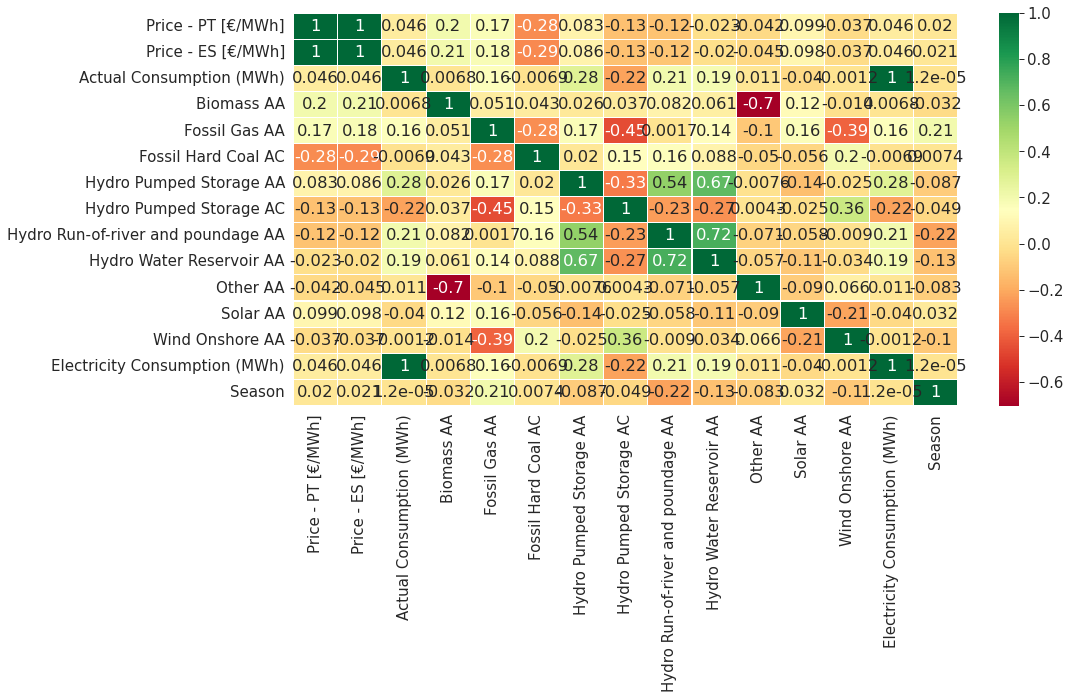

In [33]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.7)  
plt.figure(figsize=(16,10))
sns.heatmap(correlation, annot=True, cmap='RdYlGn', linewidths=0.1)
plt.tight_layout()

## Further plots

### Data changes through time

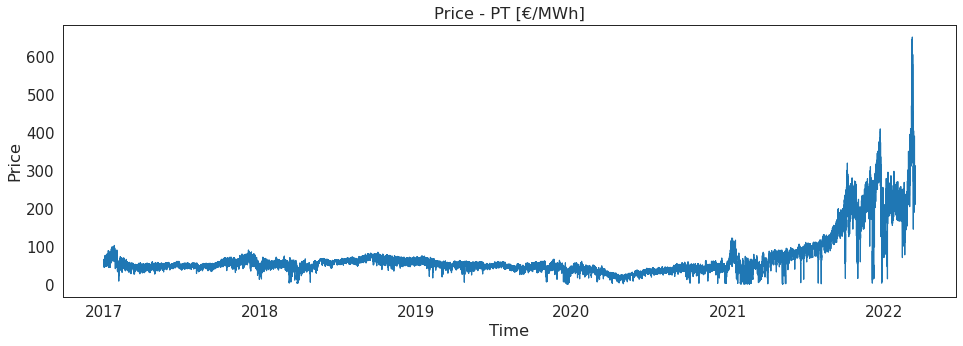

In [ ]:
columns = ['Price - PT [€/MWh]']

df.set_index("Time", inplace=True)

for column in columns:
    plt.figure(figsize=(16,5))
    plt.gca().set(title= column, xlabel='Time', ylabel='Price')
    plt.plot(df.index, df[column]) 
    plt.show()

### Plotting data evolution yearly seperated

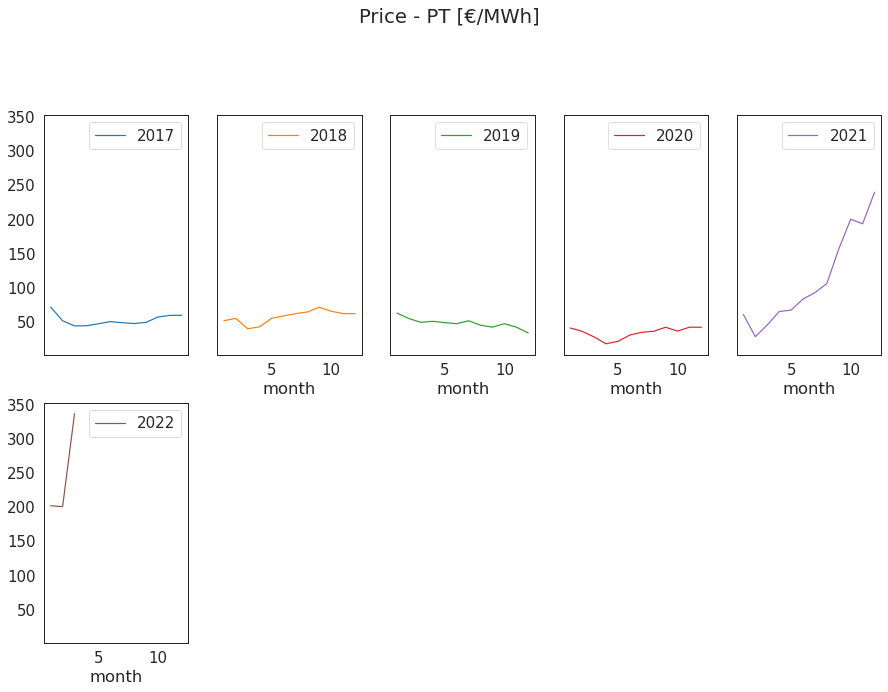

In [ ]:
for column in columns:
    dfPivot = pd.pivot_table(df, values = column, columns = "year", index = "month")
    dfPivot.plot(subplots = True, figsize=(15, 15), layout=(3, 5), sharey=True, title=column);

### Average price by year, quarter, month and day

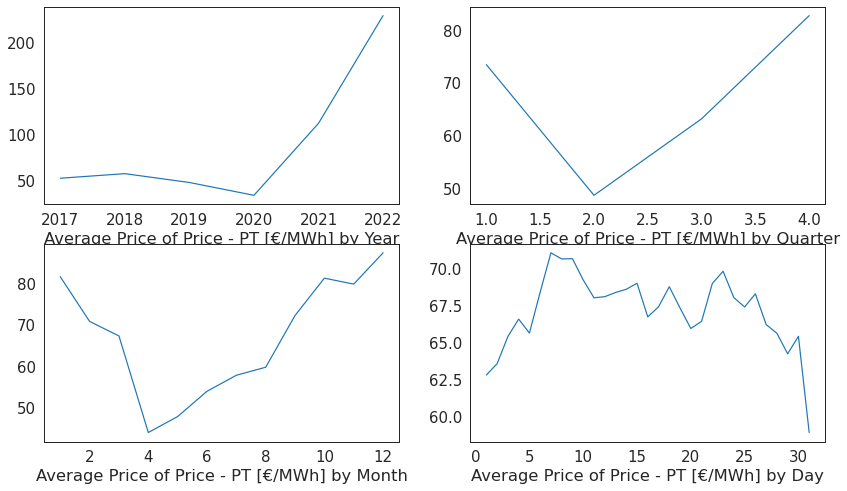

In [ ]:
for column in columns:
    plt.figure(figsize=(14,8))
    plt.subplot(2,2,1)
    df.groupby('year')[column].agg('mean').plot();
    plt.xlabel('Average Price of '+ column +' by Year')

    plt.subplot(2,2,2)
    df.groupby('quarter')[column].agg('mean').plot();
    plt.xlabel('Average Price of '+ column +' by Quarter')

    plt.subplot(2,2,3)
    df.groupby('month')[column].agg('mean').plot();
    plt.xlabel('Average Price of '+ column +' by Month')

    plt.subplot(2,2,4)
    df.groupby('day')[column].agg('mean').plot();
    plt.xlabel('Average Price of '+ column +' by Day');

### Yearly and Quarrtely load in boxplots

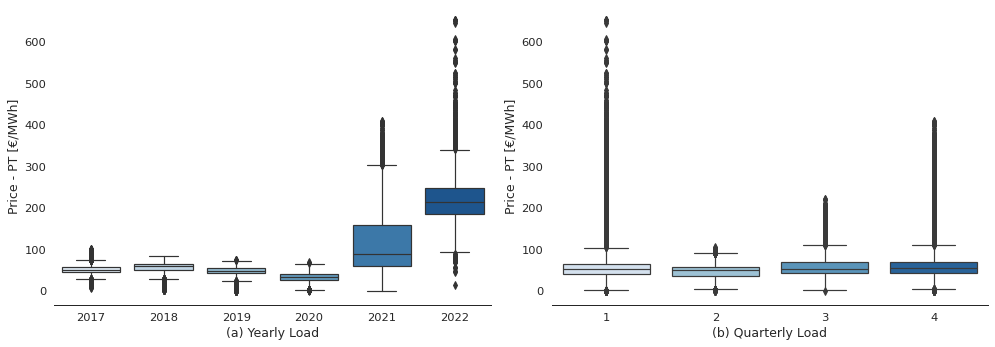

In [ ]:
for column in columns:
    sns.set_style('white')
    sns.set_context("paper", font_scale=1.3)  
    a=plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    plt.subplots_adjust(wspace=0.2)
    sns.boxplot(x="year", y=column, data=df, palette='Blues');
    plt.xlabel('(a) Yearly Load')
    sns.despine(left=True);
    plt.tight_layout() 

    plt.subplot(1,2,2)

    sns.boxplot(x="quarter", y=column, data=df, palette='Blues');
    plt.xlabel('(b) Quarterly Load')
    sns.despine(left=True);
    plt.tight_layout()

### Monthly and Daily load in boxplots 

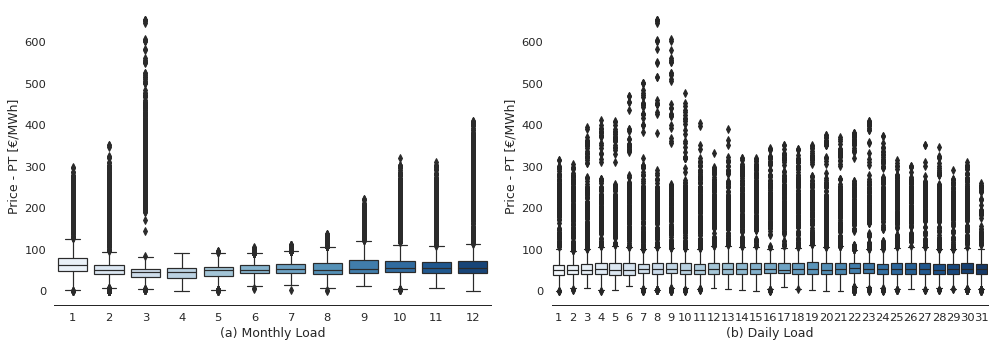

In [ ]:
for column in columns:
    sns.set_style('white')
    sns.set_context("paper", font_scale=1.3)  
    a=plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    plt.subplots_adjust(wspace=0.2)
    sns.boxplot(x="month", y=column, data=df, palette='Blues');
    plt.xlabel('(a) Monthly Load')
    sns.despine(left=True);
    plt.tight_layout() 

    plt.subplot(1,2,2)

    sns.boxplot(x="day", y=column, data=df, palette='Blues');
    plt.xlabel('(b) Daily Load')
    sns.despine(left=True);
    plt.tight_layout()